In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils.preprocessing import *

In [2]:
pose_csv = '../videos/video_1_sim2DLC_resnet50_bottomup_clearSep21shuffle1_1030000.csv'
pose_df = pd.read_csv(pose_csv, header=[0, 1, 2], index_col=0)
pose = np.array([pose_df.iloc[:, c] for c in np.arange(pose_df.shape[1]) if not np.mod(c, 3)==2]).T
print(pose.shape)

(5322, 12)


### original data table

In [3]:
pose_df[::3].head(40)

scorer    DLC_resnet50_bottomup_clearSep21shuffle1_1030000              \
bodyparts                                            snout               
coords                                                   x           y   
0                                               542.485718  169.076569   
3                                               541.652344  169.218979   
6                                               539.810730  168.853104   
9                                               539.852905  169.801895   
12                                              539.456848  171.353775   
15                                              540.242249  171.650970   
18                                              540.833435  170.487015   
21                                              541.300354  169.258514   
24                                              540.860962  168.825256   
27                                              539.422974  169.737503   
30                                              540.407593  170.809784   
33                                              540.448792  169.200638   
36                                              546.668396  171.441025   
39                                              547.317993  170.578842   
42                                              557.149170  181.988419   
45                                              559.793152  187.294495   
48                                              564.833496  180.219925   
51                                              569.872192  181.889069   
54                                              573.462280  186.039307   
57                                              574.759583  191.973465   
60                                              577.724792  194.569366   
63                                              579.723511  189.093719   
66                                              581.649109  191.736267   
69                                              581.646851  191.819611   
72                                              581.052002  192.339188   
75                                              580.302002  191.474686   
78                                              580.953796  191.185837   
81                                              580.627869  191.597626   
84                                              580.558167  190.674850   
87                                              573.325806  187.092697   
90                                              574.813904  185.435226   
93                                              578.472900  190.461761   
96                                              580.988037  192.429184   
99                                              580.831970  187.219879   
102                                             581.825073  185.877960   
105                                             581.891541  185.768311   
108                                             581.420105  186.976547   
111                                             578.768738  188.540863   
114                                             578.606445  192.872299   
117                                             574.747742  199.335739   

scorer                                                                  \
bodyparts            right-forepaw                        left-forepaw   
coords    likelihood             x           y likelihood            x   
0           1.000000    516.833130  159.262787   0.999998   494.528870   
3           1.000000    517.793823  158.766113   0.999999   493.384857   
6           1.000000    517.325989  159.309540   0.999998   493.958221   
9           1.000000    516.897583  159.087769   0.999999   494.074402   
12          0.999999    517.241882  159.026443   0.999998   493.894135   
15          0.999997    517.207703  159.553406   0.999997   494.045715   
18          0.999999    517.611633  158.711121   0.999999   493.535095   
21          1.000000    517.650757  158.719009   0.999999   494.048004   
24 

### after removing likelihood and headers

In [4]:
pose[:5, :]

array([[542.48571777, 169.0765686 , 516.83312988, 159.26278687,
        494.52886963, 177.84291077, 450.86773682, 152.21592712,
        471.72891235, 187.11956787, 437.10192871, 173.6499176 ],
       [542.984375  , 169.52424622, 517.95544434, 158.76469421,
        493.78582764, 176.83566284, 451.09661865, 151.84295654,
        470.13967896, 187.71981812, 436.93258667, 173.94384766],
       [543.16259766, 169.54290771, 518.20202637, 158.72128296,
        493.64151001, 177.05638123, 450.73544312, 152.15101624,
        470.18032837, 187.52076721, 437.45037842, 173.73771667],
       [541.65234375, 169.21897888, 517.79382324, 158.76611328,
        493.38485718, 176.80541992, 450.23587036, 151.98696899,
        470.23370361, 187.75798035, 437.12304688, 174.21769714],
       [541.83105469, 168.97744751, 517.74981689, 158.71394348,
        493.6137085 , 176.80363464, 450.30328369, 151.92478943,
        470.0305481 , 187.7199707 , 436.67858887, 174.24842834]])

### plot

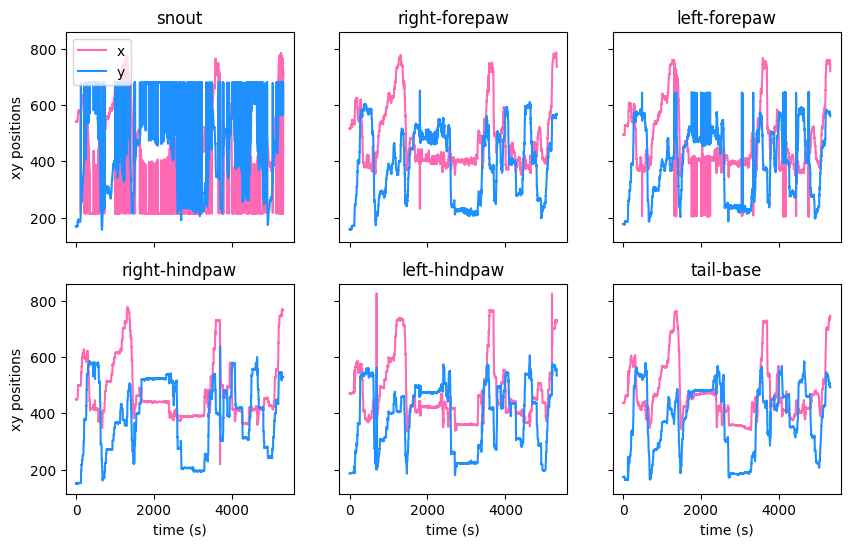

In [5]:
# plot all example files
bodyparts_names = ['snout',
                   'right-forepaw', 'left-forepaw', 
                   'right-hindpaw', 'left-hindpaw', 
                   'tail-base']
cols = 3
rows = int(np.ceil(int(pose.shape[1]/2)/cols))
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 6), sharex=True, sharey=True)
for row in range(rows):
    for col in range(cols):
        try:
            ax[row, col].plot(pose[:, 2*count], c='hotpink', label='x')
            ax[row, col].plot(pose[:, 2*count+1], c='dodgerblue', label='y')
            if col == 0 and row == 0:
                ax[row, col].legend()
            ax[row, col].set_title(bodyparts_names[count])
            if col == 0:
                ax[row, col].set_ylabel('xy positions')

            if row == rows-1:
                ax[row, col].set_xlabel('time (s)')
            count += 1
        except IndexError:
            pass

plt.show()



### save processed pose file 

In [6]:
np.save('../processed_data/pose_sim2.npy', pose)